FWHM:  0.06006006006006005
FWHM_up:  0.07907907907907907 difference to FWHM:  0.01901901901901902
FWHM_down:  0.04404404404404404 difference to FWHM:  0.016016016016016016
FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) =  0.024864349045794234


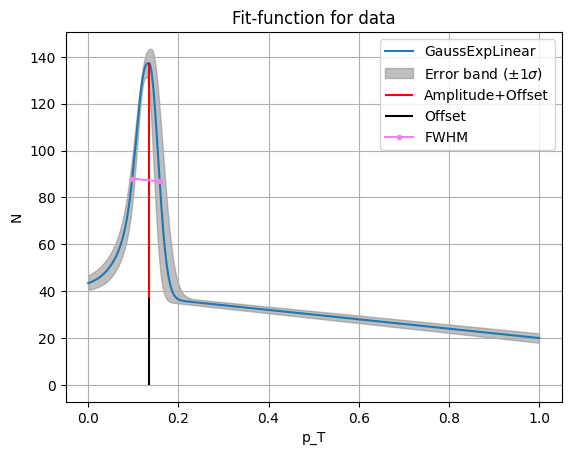

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GaussExpLinear function
def GaussExpLinear(x, params):
    if x < params[1]:
        return (params[0] * (np.exp(-0.5 * ((x - params[1]) / params[2])**2) + np.exp((x - params[1]) / params[3]) * (1. - np.exp(-0.5 * ((x - params[1]) / params[2])**2))) + params[4] + params[5] * x)
    else:
        return (params[0] * np.exp(-0.5 * ((x - params[1]) / params[2])**2) + params[4] + params[5] * x)

def Linear(x, params):
    return params[4] + params[5] * x




# Parameters [0, 1, 2, 3, 4, 5]
params = [1e2, 0.135, 0.020, 0.04, 40, -20]
params_err = [5, 0.005, 0.005, 0.008, 1, 1]

# Create x values
x_values = np.linspace(0, 1, 1000)

# Calculate y values using the defined function
y_values = np.array([GaussExpLinear(x, params) for x in x_values])
y_linear = np.array([Linear(x, params) for x in x_values])
offset_mean = Linear(params[1], params)


def calc_FWHM(histo, bins, params):
    maximum = params[0]+params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum + Linear(histo[:maximum_index], params))))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum + Linear(histo[maximum_index:], params))))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_index, right_index




def calc_FWHM2(histo, bins, params):
    maximum = params[0] + params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum + Linear(bins[:maximum_index], params))))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum + Linear(bins[maximum_index:], params))))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_x, right_x



# Plot the function using matplotlib
plt.plot(x_values, y_values, label = 'GaussExpLinear')

# Calculate the central fit values and upper/lower bounds based on errors
y_fit = [GaussExpLinear(x, params) for x in x_values]
y_lower = [GaussExpLinear(x, [params[i] - params_err[i] for i in range(len(params))]) for x in x_values]
y_upper = [GaussExpLinear(x, [params[i] + params_err[i] for i in range(len(params))]) for x in x_values]

# Plot the error band
plt.fill_between(x_values, y_lower, y_upper, color='gray', alpha=0.5, label=r'Error band ($\pm 1 \sigma$)')



#plt.plot(x_values, y_linear, label = "Linear + half amplitude")
#plt.plot(x_values, y_linear+params[0]/2, label = "Linear")
plt.vlines(x = params[1], ymin = offset_mean, ymax = params[0]+offset_mean, color = 'r', label = 'Amplitude+Offset')
plt.vlines(x = params[1], ymin = 0, ymax = offset_mean, color= 'black', label = 'Offset')
#
FWHM, left_x, right_x = calc_FWHM2(y_values, x_values, params)
print("FWHM: ", FWHM)

FWHM_array = [left_x, right_x]
FWHM_y = [(params[0]) / 2 + Linear(FWHM_array[0], params), (params[0]) / 2 + Linear(FWHM_array[1], params)]

plt.plot(FWHM_array,FWHM_y , marker = '.',color = 'violet', label= 'FWHM')

FWHM_up, left_x_up, right_x_up = calc_FWHM2(y_upper, x_values, params+params_err)
print("FWHM_up: ",FWHM_up, "difference to FWHM: ", FWHM_up - FWHM)
FWHM_array_up = [left_x_up, right_x_up]
FWHM_y_up = [(params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[0], params+params_err), (params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[1], params+params_err)]
#plt.plot(FWHM_array_up,FWHM_y_up , marker = '.',color = 'darkviolet', label= 'FWHM_up')

FWHM_down, left_x_down, right_x_down = calc_FWHM2(y_lower, x_values, params+ -1*params_err)
print("FWHM_down: ",FWHM_down, "difference to FWHM: ", FWHM - FWHM_down)
FWHM_array_down = [left_x_down, right_x_down]
FWHM_y_down = [(params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[0], params+ -1*params_err), (params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[1], params+ -1*params_err)]
#plt.plot(FWHM_array_down,FWHM_y_down , marker = '.',color = 'red', label= 'FWHM_down')

print("FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) = ", np.sqrt((FWHM_up - FWHM)**2 + (FWHM - FWHM_down)**2))

plt.xlabel(r'$M_{\gamma \gamma}')
plt.ylabel('N')
plt.legend()
plt.grid()
plt.title('Fit-function for data')
plt.show()



now should be able to do the same with mean + mean_err and mean - mean_err. Then FWHM error should be sqrt((mean_plus-mean)^2 + (mean_minus-mean)^2)

FWHM:  0.06006006006006005
FWHM_up:  0.04004004004004004 difference to FWHM:  -0.020020020020020013
FWHM_down:  0.018018018018018 difference to FWHM:  0.04204204204204205
FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) =  0.046565378777229265


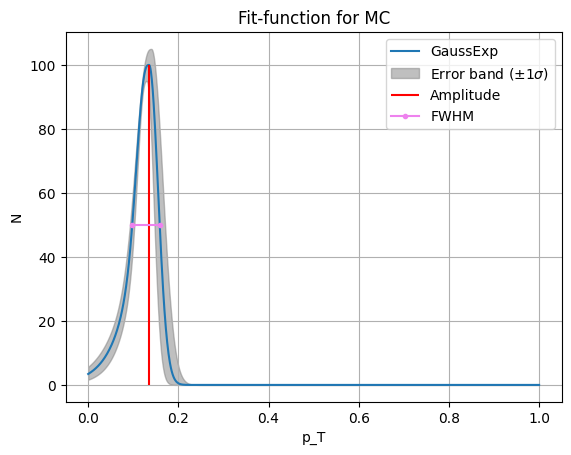

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GaussExpLinear function
def GaussExp(x, params):
    if x < params[1]:
        return (params[0] * (np.exp(-0.5 * ((x - params[1]) / params[2])**2) + np.exp((x - params[1]) / params[3]) * (1. - np.exp(-0.5 * ((x - params[1]) / params[2])**2))) )
    else:
        return (params[0] * np.exp(-0.5 * ((x - params[1]) / params[2])**2) )

def Linear(x, params):
    return params[4] + params[5] * x




# Parameters [0, 1, 2, 3, 4, 5]
params = [1e2, 0.135, 0.020, 0.04, 40, -20]
params_err = [5, 0.005, 0.005, 0.008, 1, 1]

# Create x values
x_values = np.linspace(0, 1, 1000)

# Calculate y values using the defined function
y_values = np.array([GaussExp(x, params) for x in x_values])
y_linear = np.array([Linear(x, params) for x in x_values])
offset_mean = Linear(params[1], params)


def calc_FWHM(histo, bins, params):
    maximum = params[0]+params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum + Linear(histo[:maximum_index], params))))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum + Linear(histo[maximum_index:], params))))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_index, right_index




def calc_FWHM3(histo, bins, params):
    maximum = params[0] + params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum)))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum )))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_x, right_x



# Plot the function using matplotlib
plt.plot(x_values, y_values, label = 'GaussExp')

# Calculate the central fit values and upper/lower bounds based on errors
y_fit = [GaussExp(x, params) for x in x_values]
y_lower = [GaussExp(x, [params[i] - params_err[i] for i in range(len(params))]) for x in x_values]
y_upper = [GaussExp(x, [params[i] + params_err[i] for i in range(len(params))]) for x in x_values]

# Plot the error band
plt.fill_between(x_values, y_lower, y_upper, color='gray', alpha=0.5, label=r'Error band ($\pm 1 \sigma$)')



#plt.plot(x_values, y_linear, label = "Linear + half amplitude")
#plt.plot(x_values, y_linear+params[0]/2, label = "Linear")
plt.vlines(x = params[1], ymin = 0, ymax = params[0], color = 'r', label = 'Amplitude')
#plt.vlines(x = params[1], ymin = 0, ymax = offset_mean, color= 'black', label = 'Offset')
#
FWHM, left_x, right_x = calc_FWHM3(y_values, x_values, params)
print("FWHM: ", FWHM)

FWHM_array = [left_x, right_x]
FWHM_y = [(params[0]) / 2 , (params[0]) / 2 ]

plt.plot(FWHM_array,FWHM_y , marker = '.',color = 'violet', label= 'FWHM')

FWHM_up, left_x_up, right_x_up = calc_FWHM2(y_upper, x_values, params+params_err)
print("FWHM_up: ",FWHM_up, "difference to FWHM: ", FWHM_up - FWHM)
FWHM_array_up = [left_x_up, right_x_up]
FWHM_y_up = [(params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[0], params+params_err), (params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[1], params+params_err)]
#plt.plot(FWHM_array_up,FWHM_y_up , marker = '.',color = 'darkviolet', label= 'FWHM_up')

FWHM_down, left_x_down, right_x_down = calc_FWHM2(y_lower, x_values, params+ -1*params_err)
print("FWHM_down: ",FWHM_down, "difference to FWHM: ", FWHM - FWHM_down)
FWHM_array_down = [left_x_down, right_x_down]
FWHM_y_down = [(params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[0], params+ -1*params_err), (params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[1], params+ -1*params_err)]
#plt.plot(FWHM_array_down,FWHM_y_down , marker = '.',color = 'red', label= 'FWHM_down')

print("FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) = ", np.sqrt((FWHM_up - FWHM)**2 + (FWHM - FWHM_down)**2))

plt.xlabel('p_T')
plt.ylabel('N')
plt.legend()
plt.grid()
plt.title('Fit-function for MC')
plt.show()



FWHM:  0.06086086086086087
FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) =  0.025212510897187044


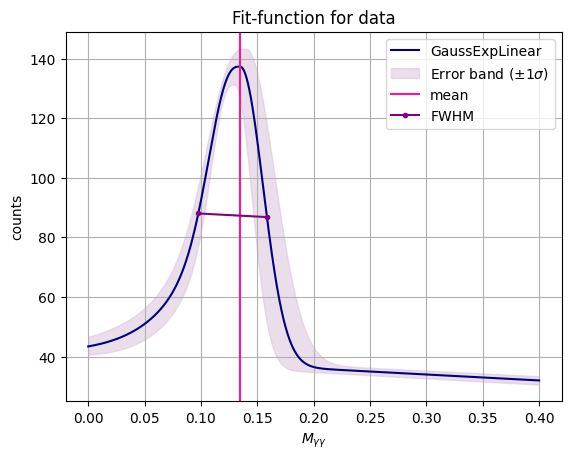

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GaussExpLinear function
def GaussExpLinear(x, params):
    if x < params[1]:
        return (params[0] * (np.exp(-0.5 * ((x - params[1]) / params[2])**2) + np.exp((x - params[1]) / params[3]) * (1. - np.exp(-0.5 * ((x - params[1]) / params[2])**2))) + params[4] + params[5] * x)
    else:
        return (params[0] * np.exp(-0.5 * ((x - params[1]) / params[2])**2) + params[4] + params[5] * x)

def Linear(x, params):
    return params[4] + params[5] * x

# Parameters [0, 1, 2, 3, 4, 5]
params = [1e2, 0.135, 0.020, 0.04, 40, -20]
params_err = [5, 0.005, 0.005, 0.008, 1, 1]

# Create x values
x_values = np.linspace(0, 0.4, 1000)

# Calculate y values using the defined function
y_values = np.array([GaussExpLinear(x, params) for x in x_values])
y_linear = np.array([Linear(x, params) for x in x_values])
offset_mean = Linear(params[1], params)

def calc_FWHM(histo, bins, params):
    maximum = params[0]+params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum + Linear(histo[:maximum_index], params))))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum + Linear(histo[maximum_index:], params))))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_index, right_index

def calc_FWHM2(histo, bins, params):
    maximum = params[0] + params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum + Linear(bins[:maximum_index], params))))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum + Linear(bins[maximum_index:], params))))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_x, right_x

# Plot the function using matplotlib
plt.plot(x_values, y_values, color = 'navy', label = 'GaussExpLinear')

# Calculate the central fit values and upper/lower bounds based on errors
y_fit = [GaussExpLinear(x, params) for x in x_values]
y_lower = [GaussExpLinear(x, [params[i] - params_err[i] for i in range(len(params))]) for x in x_values]
y_upper = [GaussExpLinear(x, [params[i] + params_err[i] for i in range(len(params))]) for x in x_values]

# Plot the error band
plt.fill_between(x_values, y_lower, y_upper, color='thistle', alpha=0.5, label=r'Error band ($\pm 1 \sigma$)')


plt.axvline(x = params[1],  color = 'deeppink', label = 'mean') #x = params[1], ymin = offset_mean, ymax = params[0]+offset_mean,
#plt.vlines(x = params[1], ymin = 0, ymax = offset_mean, color= 'black', label = 'Offset')
#
FWHM, left_x, right_x = calc_FWHM2(y_values, x_values, params)
print("FWHM: ", FWHM)

FWHM_array = [left_x, right_x]
FWHM_y = [(params[0]) / 2 + Linear(FWHM_array[0], params), (params[0]) / 2 + Linear(FWHM_array[1], params)]

plt.plot(FWHM_array,FWHM_y , marker = '.',color = 'purple', label= 'FWHM')

# FWHM_up, left_x_up, right_x_up = calc_FWHM2(y_upper, x_values, params+params_err)
# print("FWHM_up: ",FWHM_up, "difference to FWHM: ", FWHM_up - FWHM)
# FWHM_array_up = [left_x_up, right_x_up]
# FWHM_y_up = [(params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[0], params+params_err), (params[0]+params_err[0]) / 2 + Linear(FWHM_array_up[1], params+params_err)]
# #plt.plot(FWHM_array_up,FWHM_y_up , marker = '.',color = 'darkviolet', label= 'FWHM_up')

# FWHM_down, left_x_down, right_x_down = calc_FWHM2(y_lower, x_values, params+ -1*params_err)
# print("FWHM_down: ",FWHM_down, "difference to FWHM: ", FWHM - FWHM_down)
# FWHM_array_down = [left_x_down, right_x_down]
# FWHM_y_down = [(params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[0], params+ -1*params_err), (params[0]+ -1*params_err[0]) / 2 + Linear(FWHM_array_down[1], params+ -1*params_err)]
# #plt.plot(FWHM_array_down,FWHM_y_down , marker = '.',color = 'red', label= 'FWHM_down')

#print("FWHM_err: sqrt(diff_FWHM_up^2 + diff_FWHM_down^2) = ", np.sqrt((FWHM_up - FWHM)**2 + (FWHM - FWHM_down)**2))

plt.xlabel(r'$M_{\gamma \gamma}$')
plt.ylabel('counts')
plt.legend()
plt.grid()
plt.title('Fit-function for data')
plt.show()

FWHM:  0.06086086086086087


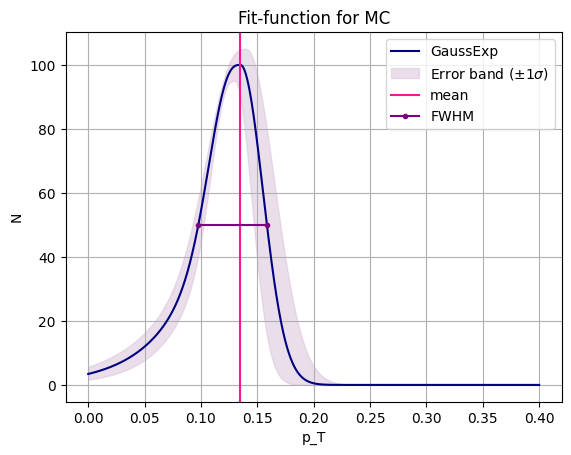

In [12]:
# Define the GaussExp function
def GaussExp(x, params):
    if x < params[1]:
        return (params[0] * (np.exp(-0.5 * ((x - params[1]) / params[2])**2) + np.exp((x - params[1]) / params[3]) * (1. - np.exp(-0.5 * ((x - params[1]) / params[2])**2))) )
    else:
        return (params[0] * np.exp(-0.5 * ((x - params[1]) / params[2])**2) )
    

# Parameters [0, 1, 2, 3, 4, 5]
params = [1e2, 0.135, 0.020, 0.04, 40, -20]
params_err = [5, 0.005, 0.005, 0.008, 1, 1]

# Create x values
x_values = np.linspace(0, 0.4, 1000)

# Calculate y values using the defined function
y_values = np.array([GaussExp(x, params) for x in x_values])
y_linear = np.array([Linear(x, params) for x in x_values])
offset_mean = Linear(params[1], params)


def calc_FWHM3(histo, bins, params):
    maximum = params[0] + params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum)))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum )))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_x, right_x

# Plot the function using matplotlib
plt.plot(x_values, y_values,color = 'navy', label = 'GaussExp')

# Calculate the central fit values and upper/lower bounds based on errors
y_fit = [GaussExp(x, params) for x in x_values]
y_lower = [GaussExp(x, [params[i] - params_err[i] for i in range(len(params))]) for x in x_values]
y_upper = [GaussExp(x, [params[i] + params_err[i] for i in range(len(params))]) for x in x_values]

# Plot the error band
plt.fill_between(x_values, y_lower, y_upper, color='thistle', alpha=0.5, label=r'Error band ($\pm 1 \sigma$)')



plt.axvline(x = params[1],  color = 'deeppink', label = 'mean')

FWHM, left_x, right_x = calc_FWHM3(y_values, x_values, params)
print("FWHM: ", FWHM)

FWHM_array = [left_x, right_x]
FWHM_y = [(params[0]) / 2 , (params[0]) / 2 ]

plt.plot(FWHM_array,FWHM_y , marker = '.',color = 'purple', label= 'FWHM')


plt.xlabel('p_T')
plt.ylabel('N')
plt.legend()
plt.grid()
plt.title('Fit-function for MC')
plt.show()


FWHM:  0.05245245245245246


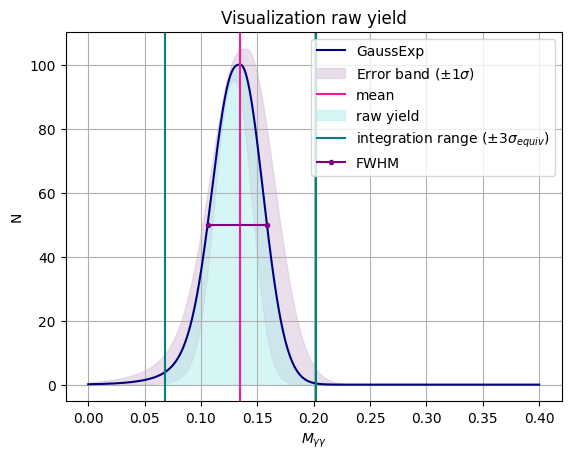

In [33]:
# Define the GaussExp function
def GaussExp(x, params):
    if x < params[1]:
        return (params[0] * (np.exp(-0.5 * ((x - params[1]) / params[2])**2) + np.exp((x - params[1]) / params[3]) * (1. - np.exp(-0.5 * ((x - params[1]) / params[2])**2))) )
    else:
        return (params[0] * np.exp(-0.5 * ((x - params[1]) / params[2])**2) )
    

# Parameters [0, 1, 2, 3, 4, 5]
params = [1e2, 0.135, 0.020, 0.02, 40, -20]
params_err = [5, 0.005, 0.005, 0.008, 1, 1]

# Create x values
x_values = np.linspace(0, 0.4, 1000)

# Calculate y values using the defined function
y_values = np.array([GaussExp(x, params) for x in x_values])
y_linear = np.array([Linear(x, params) for x in x_values])
offset_mean = Linear(params[1], params)


def calc_FWHM3(histo, bins, params):
    maximum = params[0] + params[4] + params[5] * params[1]
    maximum_index = np.argmax(histo)
    maximum_x = bins[maximum_index]
    half_maximum = params[0] / 2

    # Find left boundary of FWHM
    left_index = np.argmin(np.abs(histo[:maximum_index] - (half_maximum)))
    left_x = bins[left_index]

    # Find right boundary of FWHM
    right_index = np.argmin(np.abs(histo[maximum_index:] - (half_maximum )))
    right_x = bins[maximum_index + right_index]

    FWHM = right_x - left_x
    return FWHM, left_x, right_x

# Plot the function using matplotlib
plt.plot(x_values, y_values,color = 'navy', label = 'GaussExp')


# Calculate the central fit values and upper/lower bounds based on errors
y_fit = [GaussExp(x, params) for x in x_values]
y_lower = [GaussExp(x, [params[i] - params_err[i] for i in range(len(params))]) for x in x_values]
y_upper = [GaussExp(x, [params[i] + params_err[i] for i in range(len(params))]) for x in x_values]

# Plot the error band
plt.fill_between(x_values, y_lower, y_upper, color='thistle', alpha=0.5, label=r'Error band ($\pm 1 \sigma$)')



plt.axvline(x = params[1],  color = 'deeppink', label = 'mean')

FWHM, left_x, right_x = calc_FWHM3(y_values, x_values, params)
print("FWHM: ", FWHM)

# Calculate the central fit values and upper/lower bounds based on errors
x_yield = np.linspace(params[1]-3*FWHM/np.sqrt(8*np.log(2)), params[1]+3*FWHM/np.sqrt(8*np.log(2)), 1000)
y_fit = [GaussExp(x, params) for x in x_yield]
zeroline = [0*x for x in x_yield]
y_upper = [GaussExp(x, [params[i] for i in range(len(params))]) for x in x_yield]

# Plot the error band
plt.fill_between(x_yield, zeroline, y_fit, color='paleturquoise', alpha=0.5, label=r'raw yield')

plt.axvline(x = params[1]-3*FWHM/np.sqrt(8*np.log(2)),  color = 'teal', label = 'integration range ($\pm 3 \sigma_{equiv}$)')
plt.axvline(x = params[1]+3*FWHM/np.sqrt(8*np.log(2)),  color = 'teal')
FWHM_array = [left_x, right_x]
FWHM_y = [(params[0]) / 2 , (params[0]) / 2 ]

plt.plot(FWHM_array,FWHM_y , marker = '.',color = 'purple', label= 'FWHM')


plt.xlabel(r'$M_{\gamma \gamma}$')
plt.ylabel('N')
plt.legend()
plt.grid()
plt.title('Visualization raw yield')
plt.show()